In [1]:
from classes.vocabulary import Vocabulary
from classes.word2vec import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import re
from itertools import islice

In [2]:
path = './data/timemachine.txt'

if path is None:
    text =   ('Machine learning is the study of computer algorithms that ' +
              'improve automatically through experience. It is seen as a ' + 
              'subset of artificial intelligence. Machine learning algorithms '+ 
              'build a mathematical model based on sample data, known as '+ 
              'training data, in order to make predictions or decisions without ' + 
              'being explicitly programmed to do so. Machine learning algorithms '+ 
              'are used in a wide variety of applications, such as email filtering '+ 
              'and computer vision, where it is difficult or infeasible to develop '+
              'conventional algorithms to perform the needed tasks.')
    words = text.lower().split(' ')
    
else:
    with open(path, 'r', encoding='utf-8') as f:
        file = f.read().strip().lower().split('\n')
        
    words = []
    for line in file:
        words += line.split(' ')
    
w2v = Word2Vec(Vocabulary(path), dim=300, window_size=2, 
               lr=0.01, random_state=10, K=2, 
               distribute=True)
print(len(words))

55308


Cost epoch 10th:  85327.564
Cost epoch 20th:  82652.974
Cost epoch 30th:  81027.755
Cost epoch 40th:  79718.796
Cost epoch 50th:  79481.602


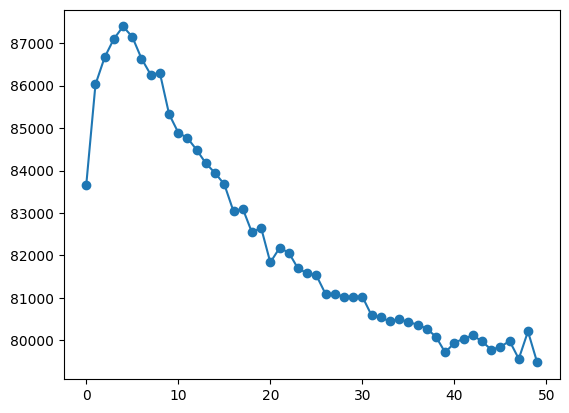

In [4]:
cost = []
max_words = 15_000
words = words[:max_words]

for j in range(50):
    total_loss = 0
    for i in range(w2v.window_size, len(words) - w2v.window_size):
        window = [words[i+j] for j in range(-w2v.window_size, w2v.window_size + 1) if j != 0]
        center_word = words[i]
        loss, n_s_i = w2v.forward(window, center_word)
        grads = w2v.backward(window, center_word, n_s_i)            
        w2v.update(grads)
        total_loss += loss 
        
    #total_loss /= len(words) - 2
    
    if not ((j + 1) % 10): print(f'Cost epoch {j+1}th: ', np.round(total_loss, decimals=3))
    cost.append(total_loss)

plt.plot(cost, '-o')
plt.show()

In [5]:
if path is not None:
    targets = ['time', 'travel', 'lamp', 'edge', 'found']
else:
    targets = ['machine', 'learning', 'data', 'algorithm', 'computer']
    
for target in targets:
    softmax = w2v.predict(target)
    indexes = np.argsort(softmax)[-5:][::-1].astype(int)

    for index in indexes:
        print(softmax[index], w2v.vocabulary[index])

    probable_words = [w2v.vocabulary[index] for index in indexes]
    print(target)
    print(probable_words)
    print('-' * 100)
    print('')

0.009778120083814712 traveller
0.007924487853446585 said
0.00721628606077883 machine
0.0031445204745673377 traveller's
0.002619642160267314 first
time
['traveller', 'said', 'machine', "traveller's", 'first']
----------------------------------------------------------------------------------------------------

0.006020170779269491 we
0.005521046566783956 through
0.004283436339274831 about
0.0024289630075360266 these
0.002055400825873654 back
travel
['we', 'through', 'about', 'these', 'back']
----------------------------------------------------------------------------------------------------

0.0022983718916499514 the
0.0018231641240868052 his
0.00153201693623526 of
0.001503015170599753 in
0.0009866727362871134 for
lamp
['the', 'his', 'of', 'in', 'for']
----------------------------------------------------------------------------------------------------

0.0006287933447459217 or
0.0005731378102182508 it
0.0004632232310974455 nothing
0.00043311747900659254 what
0.0004120415076178227 too
edg

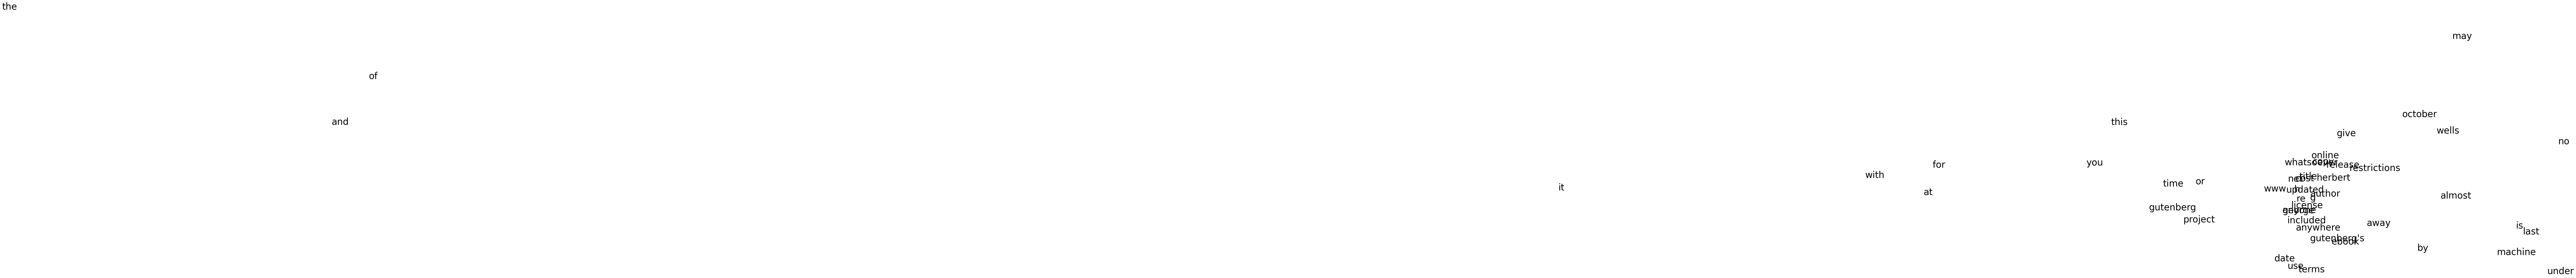

In [7]:
pca = PCA(n_components=2)
u_pca = pca.fit_transform(w2v.U.T)

text = [w2v.vocabulary.index_to_word[key] for key in np.arange(0, len(w2v.vocabulary)-1)]
text = text[:50]

u_pca_norm = np.zeros_like(u_pca)
for i in range(u_pca.shape[1]):
    u_pca_norm[:, i] = (u_pca[:, i].max() - u_pca[:, i].min()) / 


%matplotlib inline

plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(u_pca):
    if i >= len(text):
        break
    else:
        plt.text(x, y, s=text[i], 
                 fontsize=30)

plt.axis('off')
plt.show()